In [1]:
print("Nguyễn Nguyên Huy - 6351071030")

Nguyễn Nguyên Huy - 6351071030


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [5]:
path = "/content/drive/MyDrive/Colab Notebooks/Data Mining/Dataset/winequality-red.csv"

wine_df = pd.read_csv(path, sep= ',')

print("Số lượng dữ liệu huấn luyện:", len(wine_df))
print(wine_df.head())

Số lượng dữ liệu huấn luyện: 1599
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9

In [7]:
print(f"\nMissing values:\n{wine_df.isna().sum().sum()} (tổng)")
print(wine_df.isna().sum())


Missing values:
0 (tổng)
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [13]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
    # stratify=y  # ← Bỏ vì lớp 3,8 quá ít → lỗi nếu dùng
)

print(f"\nChia dữ liệu thành công!")
print(f"X_train: {X_train.shape} → {X_train.shape[0]} mẫu huấn luyện")
print(f"X_test : {X_test.shape} → {X_test.shape[0]} mẫu kiểm thử")
print(f"y_train: {y_train.shape}")
print(f"y_test : {y_test.shape}")

print("\nPhân bố quality trong train:")
print(y_train.value_counts().sort_index())

print("\nPhân bố quality trong test:")
print(y_test.value_counts().sort_index())


Chia dữ liệu thành công!
X_train: (1119, 11) → 1119 mẫu huấn luyện
X_test : (480, 11) → 480 mẫu kiểm thử
y_train: (1119,)
y_test : (480,)

Phân bố quality trong train:
quality
3      9
4     36
5    486
6    438
7    138
8     12
Name: count, dtype: int64

Phân bố quality trong test:
quality
3      1
4     17
5    195
6    200
7     61
8      6
Name: count, dtype: int64


Kiểu dữ liệu của X_train:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

Tổng số cột: 11


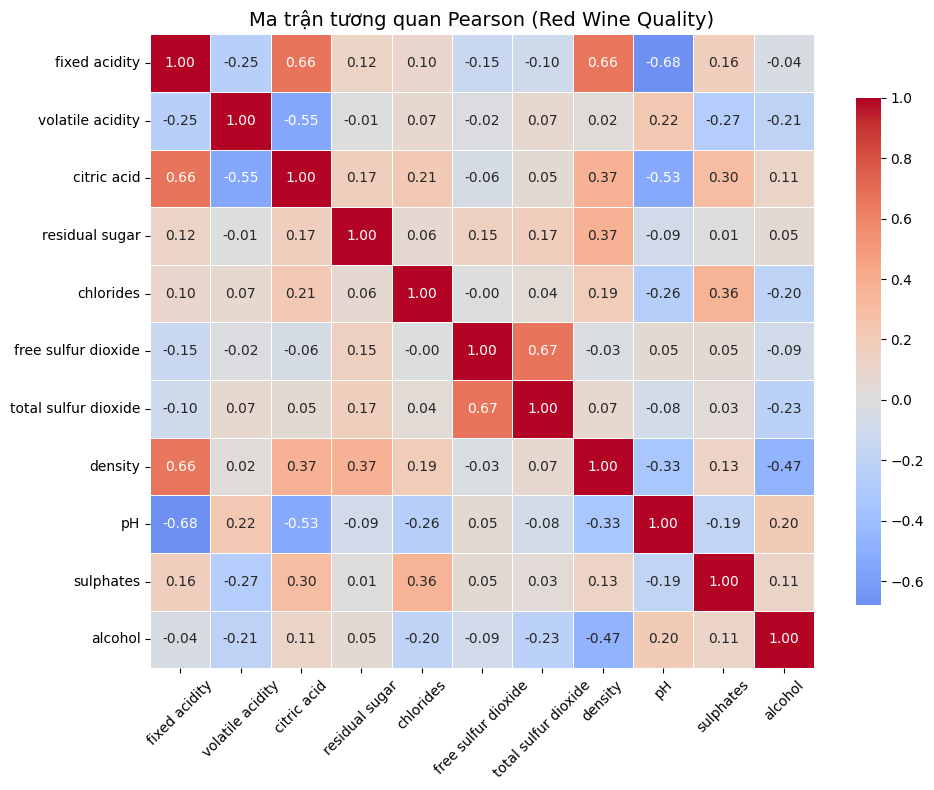


Các cặp cột có |Pearson| >= 0.6:
  → fixed acidity vs citric acid: 0.661
  → fixed acidity vs density: 0.657
  → fixed acidity vs pH: -0.678
  → free sulfur dioxide vs total sulfur dioxide: 0.669

Các cột sẽ bị loại bỏ: ['total sulfur dioxide', 'pH', 'fixed acidity']

Sau khi loại bỏ:
X_train: (1119, 8)
X_test : (480, 8)
Còn lại 8 cột

ĐÃ CẬP NHẬT X_train và X_test!
Các cột còn lại:
['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol']


In [14]:
'''
Khảo sát độ tương đồng giữa các cột với nhau bằng công thức Pearson. Những cột
nào có giá trị tương đồng cao thì hãy loại bỏ
'''
print("Kiểu dữ liệu của X_train:")
print(X_train.dtypes)
print(f"\nTổng số cột: {X_train.shape[1]}")

corr_matrix = X_train.corr(method='pearson')

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title("Ma trận tương quan Pearson (Red Wine Quality)", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

threshold = 0.6
high_corr_pairs = []

# Lặp qua nửa trên ma trận
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) >= threshold:
            high_corr_pairs.append((col1, col2, round(corr_val, 3)))

print(f"\nCác cặp cột có |Pearson| >= {threshold}:")
if high_corr_pairs:
    for col1, col2, val in high_corr_pairs:
        print(f"  → {col1} vs {col2}: {val}")
else:
    print("  Không có cặp nào vượt ngưỡng!")

cols_to_drop = set()

for col1, col2, val in high_corr_pairs:
    # Giữ cột có tên nhỏ hơn (lexicographic)
    drop_col = col2 if col1 < col2 else col1
    cols_to_drop.add(drop_col)

print(f"\nCác cột sẽ bị loại bỏ: {list(cols_to_drop)}")

# Loại bỏ khỏi X_train và X_test
X_train_clean = X_train.drop(columns=cols_to_drop)
X_test_clean  = X_test.drop(columns=cols_to_drop)

print(f"\nSau khi loại bỏ:")
print(f"X_train: {X_train_clean.shape}")
print(f"X_test : {X_test_clean.shape}")
print(f"Còn lại {X_train_clean.shape[1]} cột")

X_train = X_train_clean.copy()
X_test  = X_test_clean.copy()

print(f"\nĐÃ CẬP NHẬT X_train và X_test!")
print("Các cột còn lại:")
print(X_train.columns.tolist())

In [15]:
'''
Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một
phần chứa riêng thuộc tính quyết định.
'''
print("Thông tin hiện tại:")
print(f"X_train shape: {X_train.shape} → {X_train.shape[1]} đặc trưng")
print(f"X_test  shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test  shape: {y_test.shape}")
print(f"\nCác cột features (X):")
print(X_train.columns.tolist())

target_column = 'quality'

# Tách lại
X_train_final = X_train.copy()
X_test_final  = X_test.copy()
y_train_final = y_train.copy()
y_test_final  = y_test.copy()

print(f"\nTách dữ liệu thành công!")
print(f"→ X: chứa các thuộc tính bình thường")
print(f"→ y: chứa riêng thuộc tính quyết định ('{target_column}')")

print("\nPhân bố nhãn trong y_train:")
print(y_train_final.value_counts().sort_index())

print("\nPhân bố nhãn trong y_test:")
print(y_test_final.value_counts().sort_index())

Thông tin hiện tại:
X_train shape: (1119, 8) → 8 đặc trưng
X_test  shape: (480, 8)
y_train shape: (1119,)
y_test  shape: (480,)

Các cột features (X):
['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol']

Tách dữ liệu thành công!
→ X: chứa các thuộc tính bình thường
→ y: chứa riêng thuộc tính quyết định ('quality')

Phân bố nhãn trong y_train:
quality
3      9
4     36
5    486
6    438
7    138
8     12
Name: count, dtype: int64

Phân bố nhãn trong y_test:
quality
3      1
4     17
5    195
6    200
7     61
8      6
Name: count, dtype: int64


In [16]:
'''
Chuyển đổi các cột không phải dạng số về dạng one-hot vector để phù hợp với đầu
vào của thư viện.
'''
categorical_cols = X_train_final.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nCác cột categorical (cần one-hot): {categorical_cols}")

if len(categorical_cols) == 0:
    print("→ **Không có cột nào cần one-hot!** Tất cả đã là số (float/int).")
    print("→ Bước này **bỏ qua** – dữ liệu đã sẵn sàng cho mô hình!")
else:
    print("→ Sẽ thực hiện one-hot encoding...")

if len(categorical_cols) > 0:
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer

    # One-hot encoding
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', sparse=False), categorical_cols)
        ],
        remainder='passthrough'  # giữ lại các cột số
    )

    X_train_encoded = preprocessor.fit_transform(X_train_final)
    X_test_encoded  = preprocessor.transform(X_test_final)

    # Lấy tên cột mới
    ohe = preprocessor.named_transformers_['cat']
    cat_feature_names = ohe.get_feature_names_out(categorical_cols)
    num_feature_names = [col for col in X_train_final.columns if col not in categorical_cols]
    new_columns = list(cat_feature_names) + num_feature_names

    X_train_final = pd.DataFrame(X_train_encoded, columns=new_columns, index=X_train_final.index)
    X_test_final  = pd.DataFrame(X_test_encoded,  columns=new_columns, index=X_test_final.index)

    print(f"\nOne-hot encoding hoàn tất!")
    print(f"X_train_final shape: {X_train_final.shape}")
    print(f"X_test_final  shape: {X_test_final.shape}")
else:
    print(f"\nKhông cần one-hot → giữ nguyên X_train_final và X_test_final")

non_numeric = X_train_final.select_dtypes(exclude=[np.number]).columns
assert len(non_numeric) == 0, f"Cảnh báo: vẫn còn cột không phải số: {non_numeric.tolist()}"

print(f"\nTất cả cột đều là số → Sẵn sàng cho ID3, CART, Naive Bayes!")
print(f"X_train_final shape: {X_train_final.shape}")
print("Các cột:")
print(X_train_final.columns.tolist())


Các cột categorical (cần one-hot): []
→ **Không có cột nào cần one-hot!** Tất cả đã là số (float/int).
→ Bước này **bỏ qua** – dữ liệu đã sẵn sàng cho mô hình!

Không cần one-hot → giữ nguyên X_train_final và X_test_final

Tất cả cột đều là số → Sẵn sàng cho ID3, CART, Naive Bayes!
X_train_final shape: (1119, 8)
Các cột:
['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol']


Đang huấn luyện cây ID3...
Huấn luyện xong!
→ Độ sâu cây: 15
→ Số node lá: 302

Accuracy của ID3: 0.5646 (56.46%)


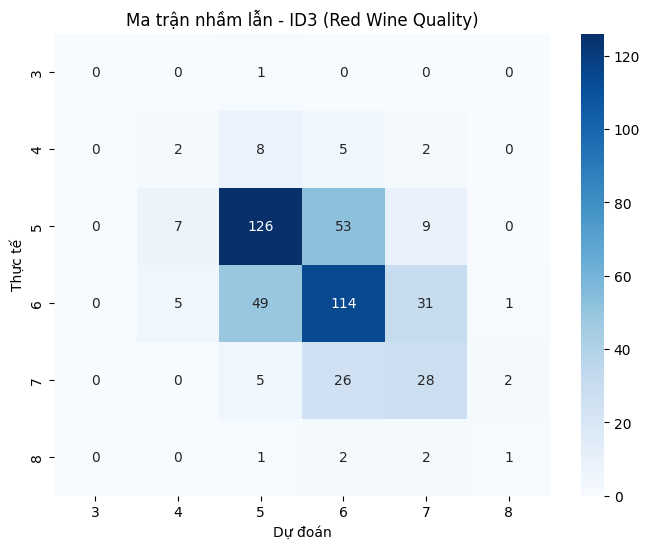


Cấu trúc cây ID3 (3 cấp đầu):
|--- alcohol <= 10.53
|   |--- sulphates <= 0.57
|   |   |--- citric acid <= 0.05
|   |   |   |--- sulphates <= 0.50
|   |   |   |   |--- truncated branch of depth 6
|   |   |   |--- sulphates >  0.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- citric acid >  0.05
|   |   |   |--- density <= 1.00
|   |   |   |   |--- truncated branch of depth 11
|   |   |   |--- density >  1.00
|   |   |   |   |--- class: 3
|   |--- sulphates >  0.57
|   |   |--- volatile acidity <= 0.41
|   |   |   |--- sulphates <= 0.69
|   |   |   |   |--- truncated branch of depth 8
|   |   |   |--- sulphates >  0.69
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- volatile acidity >  0.41
|   |   |   |--- alcohol <= 9.85
|   |   |   |   |--- truncated branch of depth 12
|   |   |   |--- alcohol >  9.85
|   |   |   |   |--- truncated branch of depth 11
|--- alcohol >  10.53
|   |--- sulphates <= 0.58
|   |   |--- volatile acidity <= 0.37
|   |   |   |---

In [17]:
'''
Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả
của cây bằng ma trận nhầm lẫn. Biểu diễn cây vào trong kết quả thực hiện.
'''
id3_model = DecisionTreeClassifier(
    criterion='entropy',    # ID3
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)

print("Đang huấn luyện cây ID3...")
id3_model.fit(X_train_final, y_train_final)
print("Huấn luyện xong!")
print(f"→ Độ sâu cây: {id3_model.get_depth()}")
print(f"→ Số node lá: {id3_model.get_n_leaves()}")

y_pred_id3 = id3_model.predict(X_test_final)

accuracy_id3 = accuracy_score(y_test_final, y_pred_id3)
print(f"\nAccuracy của ID3: {accuracy_id3:.4f} ({accuracy_id3*100:.2f}%)")

cm_id3 = confusion_matrix(y_test_final, y_pred_id3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_id3, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test_final.unique()),
            yticklabels=sorted(y_test_final.unique()))
plt.title('Ma trận nhầm lẫn - ID3 (Red Wine Quality)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

print("\nCấu trúc cây ID3 (3 cấp đầu):")
text_tree = tree.export_text(id3_model,
                             feature_names=X_train_final.columns.tolist(),
                             max_depth=3)
print(text_tree)

Đang huấn luyện cây CART...
Huấn luyện xong!
→ Độ sâu cây: 17
→ Số node lá: 310

Accuracy của CART: 0.5979 (59.79%)


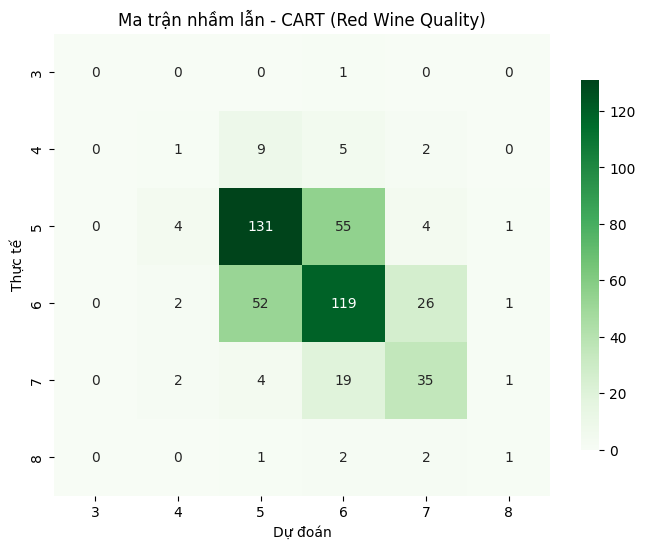


Báo cáo phân loại (CART):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.06      0.08        17
           5       0.66      0.67      0.67       195
           6       0.59      0.59      0.59       200
           7       0.51      0.57      0.54        61
           8       0.25      0.17      0.20         6

    accuracy                           0.60       480
   macro avg       0.35      0.34      0.35       480
weighted avg       0.59      0.60      0.59       480


Cấu trúc cây CART (3 cấp đầu):
|--- alcohol <= 10.53
|   |--- sulphates <= 0.57
|   |   |--- alcohol <= 9.53
|   |   |   |--- alcohol <= 9.08
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- alcohol >  9.08
|   |   |   |   |--- truncated branch of depth 10
|   |   |--- alcohol >  9.53
|   |   |   |--- volatile acidity <= 0.34
|   |   |   |   |--- class: 6
|   |   |   |--- volatile acidity >  0.34
|   |   |   

In [19]:
'''
Lặp lại yêu cầu 7 đối với cây CART.
'''
cart_model = DecisionTreeClassifier(
    criterion='gini',       # CART
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)

print("Đang huấn luyện cây CART...")
cart_model.fit(X_train_final, y_train_final)
print("Huấn luyện xong!")
print(f"→ Độ sâu cây: {cart_model.get_depth()}")
print(f"→ Số node lá: {cart_model.get_n_leaves()}")

y_pred_cart = cart_model.predict(X_test_final)

accuracy_cart = accuracy_score(y_test_final, y_pred_cart)
print(f"\nAccuracy của CART: {accuracy_cart:.4f} ({accuracy_cart*100:.2f}%)")

cm_cart = confusion_matrix(y_test_final, y_pred_cart)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cart, annot=True, fmt='d', cmap='Greens',
            xticklabels=sorted(y_test_final.unique()),
            yticklabels=sorted(y_test_final.unique()),
            cbar_kws={'shrink': 0.8})
plt.title('Ma trận nhầm lẫn - CART (Red Wine Quality)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

print("\nBáo cáo phân loại (CART):")
print(classification_report(y_test_final, y_pred_cart, zero_division=0))

print("\nCấu trúc cây CART (3 cấp đầu):")
text_tree_cart = tree.export_text(cart_model,
                                  feature_names=X_train_final.columns.tolist(),
                                  max_depth=3)
print(text_tree_cart)

Đã chuẩn hóa dữ liệu (StandardScaler) – dùng cho Naive Bayes
Đang huấn luyện Naïve Bayes (GaussianNB)...
Huấn luyện xong!

Accuracy của Naïve Bayes: 0.5333 (53.33%)


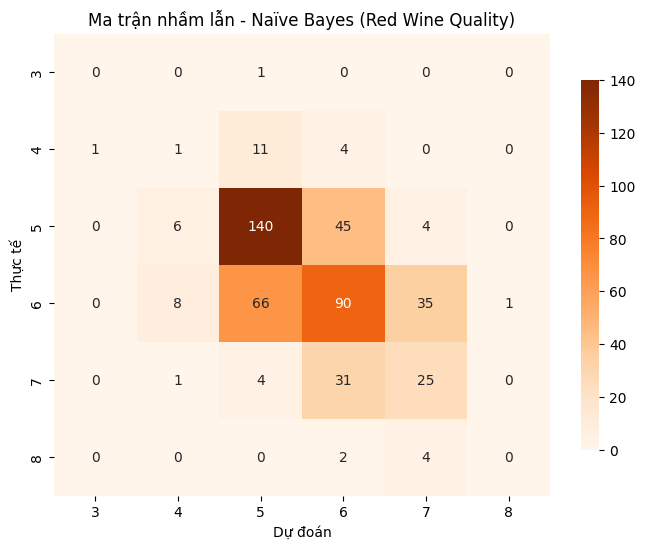


Báo cáo phân loại (Naïve Bayes):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.06      0.06      0.06        17
           5       0.63      0.72      0.67       195
           6       0.52      0.45      0.48       200
           7       0.37      0.41      0.39        61
           8       0.00      0.00      0.00         6

    accuracy                           0.53       480
   macro avg       0.26      0.27      0.27       480
weighted avg       0.52      0.53      0.53       480



In [23]:
'''
Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt
được.
'''
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled  = scaler.transform(X_test_final)

print("Đã chuẩn hóa dữ liệu (StandardScaler) – dùng cho Naive Bayes")

nb_model = GaussianNB()

print("Đang huấn luyện Naïve Bayes (GaussianNB)...")
nb_model.fit(X_train_scaled, y_train_final)
print("Huấn luyện xong!")

y_pred_nb = nb_model.predict(X_test_scaled)

accuracy_nb = accuracy_score(y_test_final, y_pred_nb)
print(f"\nAccuracy của Naïve Bayes: {accuracy_nb:.4f} ({accuracy_nb*100:.2f}%)")

cm_nb = confusion_matrix(y_test_final, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=sorted(y_test_final.unique()),
            yticklabels=sorted(y_test_final.unique()),
            cbar_kws={'shrink': 0.8})
plt.title('Ma trận nhầm lẫn - Naïve Bayes (Red Wine Quality)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

print("\nBáo cáo phân loại (Naïve Bayes):")
print(classification_report(y_test_final, y_pred_nb, zero_division=0))

BẢNG SO SÁNH CHI TIẾT:


,Model,Accuracy,Precision (macro),Recall (macro),F1-score (macro),Baseline
0,ID3,0.5646,0.3358,0.3266,0.3291,0.4167
1,CART,0.5979,0.3542,0.3443,0.3462,0.4167
2,Naïve Bayes,0.5333,0.2640,0.2728,0.2673,0.4167


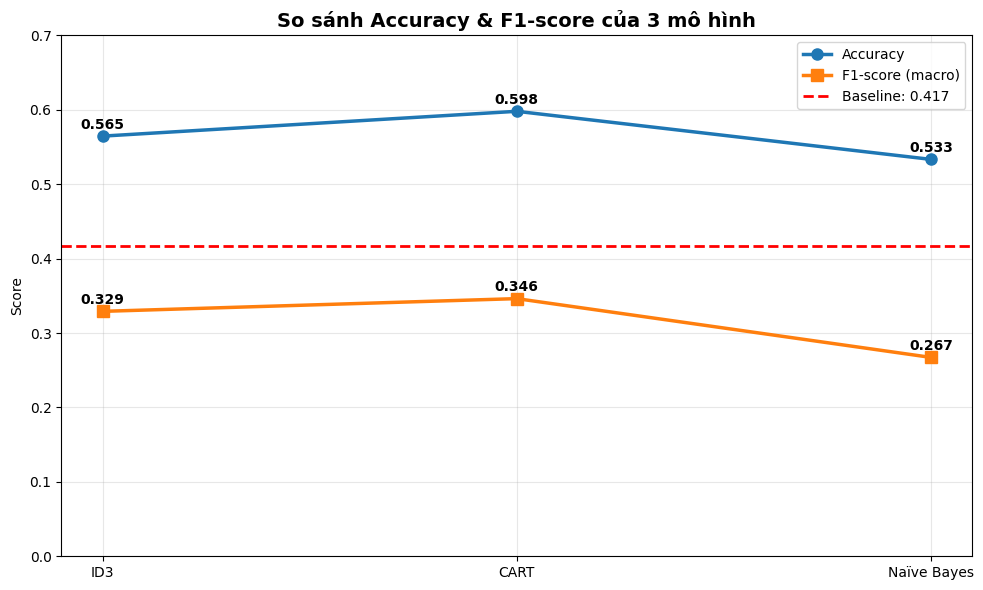

In [26]:
'''
So sánh kết quả của các mô hình trên.
'''
metrics = {
    'Model': ['ID3', 'CART', 'Naïve Bayes'],
    'Accuracy': [accuracy_id3, accuracy_cart, accuracy_nb],
    'Precision (macro)': [
        precision_score(y_test_final, y_pred_id3, average='macro', zero_division=0),
        precision_score(y_test_final, y_pred_cart, average='macro', zero_division=0),
        precision_score(y_test_final, y_pred_nb, average='macro', zero_division=0)
    ],
    'Recall (macro)': [
        recall_score(y_test_final, y_pred_id3, average='macro', zero_division=0),
        recall_score(y_test_final, y_pred_cart, average='macro', zero_division=0),
        recall_score(y_test_final, y_pred_nb, average='macro', zero_division=0)
    ],
    'F1-score (macro)': [
        f1_score(y_test_final, y_pred_id3, average='macro'),
        f1_score(y_test_final, y_pred_cart, average='macro'),
        f1_score(y_test_final, y_pred_nb, average='macro')
    ]
}

df_metrics = pd.DataFrame(metrics)

# Baseline (luôn đoán lớp 5)
baseline_acc = y_test_final.value_counts().max() / len(y_test_final)
df_metrics['Baseline'] = baseline_acc

print("BẢNG SO SÁNH CHI TIẾT:")
display(df_metrics.round(4))

plt.figure(figsize=(10, 6))
models = df_metrics['Model']
x = np.arange(len(models))

plt.plot(x, df_metrics['Accuracy'], marker='o', label='Accuracy', linewidth=2.5, markersize=8)
plt.plot(x, df_metrics['F1-score (macro)'], marker='s', label='F1-score (macro)', linewidth=2.5, markersize=8)
plt.axhline(y=baseline_acc, color='red', linestyle='--', linewidth=2, label=f'Baseline: {baseline_acc:.3f}')

plt.xticks(x, models)
plt.title('So sánh Accuracy & F1-score của 3 mô hình', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.ylim(0, 0.7)
plt.legend()
plt.grid(alpha=0.3)

# Ghi số trên điểm
for i, (acc, f1) in enumerate(zip(df_metrics['Accuracy'], df_metrics['F1-score (macro)'])):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center', fontweight='bold')
    plt.text(i, f1 + 0.01, f'{f1:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()